# Brain Tumor Classification
##### Dataset Link - https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
#### Xception
#### ResNet152V2
#### InceptionResnetV2

In [31]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import joblib
%matplotlib inline

In [2]:
TRAINING_PATH = "/kaggle/input/brain-tumor-classification-mri/Training"
TESTING_PATH = "/kaggle/input/brain-tumor-classification-mri/Testing"

In [3]:
training_images = []
training_labels = []

In [4]:
for i in os.listdir(TRAINING_PATH):
  class_name = i
  class_path = os.path.join(TRAINING_PATH, class_name)
  for j in os.listdir(class_path):
    img_path = os.path.join(class_path, j)
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (256,256))
    training_images.append(img_resized)
    training_labels.append(class_name)

for i in os.listdir(TESTING_PATH):
  class_name = i
  class_path = os.path.join(TESTING_PATH, class_name)
  for j in os.listdir(class_path):
    img_path = os.path.join(class_path, j)
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (256,256))
    training_images.append(img_resized)
    training_labels.append(class_name)

In [5]:
training_images = np.array(training_images)
training_labels = np.array(training_labels)

In [6]:
print(training_images.shape)
print(training_labels.shape)

(3264, 256, 256, 3)
(3264,)


In [7]:
training_images = training_images / 255.0

In [8]:
x_train, x_val, y_train, y_val = train_test_split(training_images, training_labels, test_size=0.3, random_state=42) 

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val) 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=4)

In [11]:
del training_images
del training_labels

## Xception

In [12]:
xception = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
    pooling="avg",
    classes=4,
    classifier_activation="softmax",
)

2022-12-14 04:58:47.104616: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 04:58:47.105609: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 04:58:47.236588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 04:58:47.237518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 04:58:47.238340: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

83697664/83683744 [==============================] - 0s 0us/step


In [13]:
for layer in xception.layers:
  layer.trainable = False

In [14]:
model_0 = tf.keras.models.Sequential()
model_0.add(xception)

model_0.add(tf.keras.layers.Flatten())
model_0.add(tf.keras.layers.Dropout(0.5))
model_0.add(tf.keras.layers.Dense(4, activation="softmax"))

In [15]:
model_0.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [16]:
history = model_0.fit(
    x_train,
    y_train,
    batch_size = 32,
    validation_data = (x_val, y_val),
    epochs = 60 
)

2022-12-14 04:58:53.340701: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1796210688 exceeds 10% of free system memory.
2022-12-14 04:58:55.317683: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1796210688 exceeds 10% of free system memory.
2022-12-14 04:58:56.782591: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60


2022-12-14 04:59:00.442698: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


72/72 [==============================] - ETA: 0s - loss: 1.0267 - accuracy: 0.5473

2022-12-14 04:59:20.949041: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 770703360 exceeds 10% of free system memory.
2022-12-14 04:59:22.035836: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 770703360 exceeds 10% of free system memory.


72/72 [==============================] - 33s 298ms/step - loss: 1.0267 - accuracy: 0.5473 - val_loss: 0.7587 - val_accuracy: 0.6827
Epoch 2/60
72/72 [==============================] - 16s 228ms/step - loss: 0.7390 - accuracy: 0.7189 - val_loss: 0.6161 - val_accuracy: 0.7837
Epoch 3/60
72/72 [==============================] - 17s 234ms/step - loss: 0.6372 - accuracy: 0.7623 - val_loss: 0.5695 - val_accuracy: 0.8143
Epoch 4/60
72/72 [==============================] - 17s 240ms/step - loss: 0.5947 - accuracy: 0.7798 - val_loss: 0.5623 - val_accuracy: 0.7908
Epoch 5/60
72/72 [==============================] - 18s 247ms/step - loss: 0.5643 - accuracy: 0.7916 - val_loss: 0.5185 - val_accuracy: 0.8163
Epoch 6/60
72/72 [==============================] - 19s 260ms/step - loss: 0.5282 - accuracy: 0.8082 - val_loss: 0.4974 - val_accuracy: 0.8245
Epoch 7/60
72/72 [==============================] - 19s 260ms/step - loss: 0.5111 - accuracy: 0.8152 - val_loss: 0.4867 - val_accuracy: 0.8357
Epoch 8/60

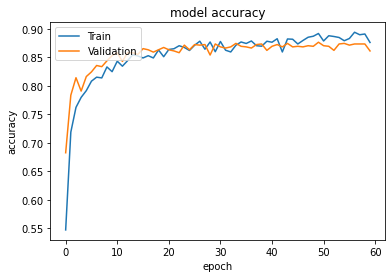

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("xception_without_data_augmentation_accuracy.png")
plt.show()

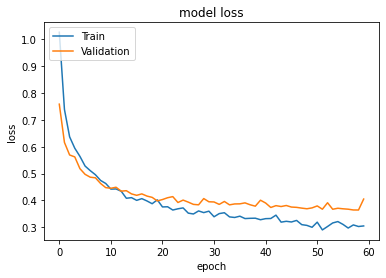

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("xception_without_data_augmentation_loss.png")
plt.show()

In [20]:
model_0.save("xception_without_data_augumentation.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [21]:
del model_0

In [22]:
del xception

## Resnet152V2

In [23]:
resnet152v2 = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
    pooling="avg",
    classes=4,
    classifier_activation="softmax",
)

234561536/234545216 [==============================] - 1s 0us/step


In [24]:
for layer in resnet152v2.layers:
  layer.trainable = False

In [25]:
model_2 = tf.keras.models.Sequential()
model_2.add(resnet152v2)

model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dropout(0.4))
model_2.add(tf.keras.layers.Dense(256,kernel_initializer='he_uniform'))
model_2.add(tf.keras.layers.Dropout(0.4))
model_2.add(tf.keras.layers.Dense(4, activation="softmax"))

In [26]:
model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [27]:
history = model_2.fit(
    x_train,
    y_train,
    batch_size = 32,
    validation_data = (x_val, y_val),
    epochs = 60 
)

2022-12-14 05:20:48.189160: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1796210688 exceeds 10% of free system memory.


Epoch 1/60
72/72 [==============================] - 46s 517ms/step - loss: 1.7466 - accuracy: 0.5823 - val_loss: 0.9069 - val_accuracy: 0.7622
Epoch 2/60
72/72 [==============================] - 32s 450ms/step - loss: 0.9207 - accuracy: 0.7421 - val_loss: 0.6877 - val_accuracy: 0.7908
Epoch 3/60
72/72 [==============================] - 32s 442ms/step - loss: 0.7635 - accuracy: 0.7715 - val_loss: 0.5067 - val_accuracy: 0.8398
Epoch 4/60
72/72 [==============================] - 31s 433ms/step - loss: 0.7323 - accuracy: 0.7723 - val_loss: 0.5745 - val_accuracy: 0.8255
Epoch 5/60
72/72 [==============================] - 31s 432ms/step - loss: 0.6171 - accuracy: 0.7964 - val_loss: 0.4843 - val_accuracy: 0.8408
Epoch 6/60
72/72 [==============================] - 31s 431ms/step - loss: 0.5351 - accuracy: 0.8174 - val_loss: 0.4598 - val_accuracy: 0.8561
Epoch 7/60
72/72 [==============================] - 31s 430ms/step - loss: 0.5424 - accuracy: 0.8165 - val_loss: 0.5101 - val_accuracy: 0.8520

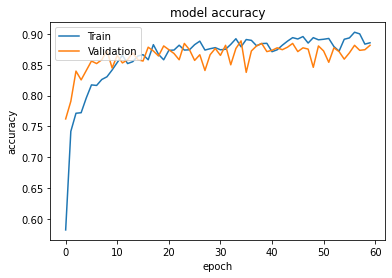

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("resnet152v2_without_data_augmentation_accuracy.png")
plt.show()

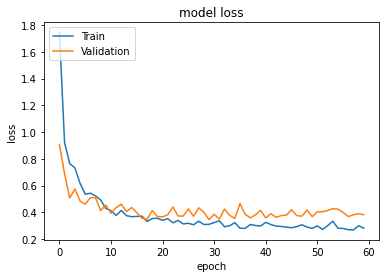

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("resnet152v2_without_data_augmentation_loss.png")
plt.show()

In [30]:
model_2.save("resnet152v2_without_data_augumentation.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [31]:
del model_2

In [32]:
del resnet152v2

## InceptionResNetV2

In [12]:
inception_resnetv2 = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
    pooling="avg",
    classes=4,
    classifier_activation="softmax",
)

2022-12-14 06:18:04.551892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 06:18:04.552848: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 06:18:04.693347: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 06:18:04.694188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 06:18:04.694935: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [13]:
for layer in inception_resnetv2.layers:
  layer.trainable = False

In [14]:
model_3 = tf.keras.models.Sequential()
model_3.add(inception_resnetv2)

model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dropout(0.4))
model_3.add(tf.keras.layers.Dense(256,activation="relu", kernel_initializer='he_uniform'))
model_3.add(tf.keras.layers.Dropout(0.4))
model_3.add(tf.keras.layers.Dense(4, activation="softmax"))

In [15]:
model_3.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [16]:
history = model_3.fit(
    x_train,
    y_train,
    batch_size = 32,
    validation_data = (x_val, y_val),
    epochs = 20 
)

2022-12-14 06:18:15.619765: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1796210688 exceeds 10% of free system memory.
2022-12-14 06:18:17.635483: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1796210688 exceeds 10% of free system memory.
2022-12-14 06:18:19.076643: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-12-14 06:18:30.253192: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


72/72 [==============================] - ETA: 0s - loss: 1.1635 - accuracy: 0.5517

2022-12-14 06:18:55.021240: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 770703360 exceeds 10% of free system memory.
2022-12-14 06:18:56.126797: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 770703360 exceeds 10% of free system memory.


72/72 [==============================] - 49s 420ms/step - loss: 1.1635 - accuracy: 0.5517 - val_loss: 0.7303 - val_accuracy: 0.7163
Epoch 2/20
72/72 [==============================] - 23s 322ms/step - loss: 0.7965 - accuracy: 0.6808 - val_loss: 0.6670 - val_accuracy: 0.7357
Epoch 3/20
72/72 [==============================] - 27s 372ms/step - loss: 0.7115 - accuracy: 0.7180 - val_loss: 0.5769 - val_accuracy: 0.7949
Epoch 4/20
72/72 [==============================] - 23s 320ms/step - loss: 0.6574 - accuracy: 0.7434 - val_loss: 0.5605 - val_accuracy: 0.7969
Epoch 5/20
72/72 [==============================] - 23s 320ms/step - loss: 0.6576 - accuracy: 0.7233 - val_loss: 0.5433 - val_accuracy: 0.7949
Epoch 6/20
72/72 [==============================] - 27s 371ms/step - loss: 0.6077 - accuracy: 0.7553 - val_loss: 0.5241 - val_accuracy: 0.8112
Epoch 7/20
72/72 [==============================] - 23s 319ms/step - loss: 0.5841 - accuracy: 0.7728 - val_loss: 0.5078 - val_accuracy: 0.8122
Epoch 8/20

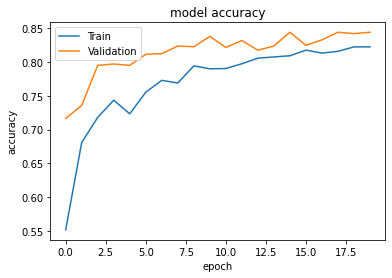

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("inception_resnet_v2_without_data_augmentation_accuracy.png")
plt.show()

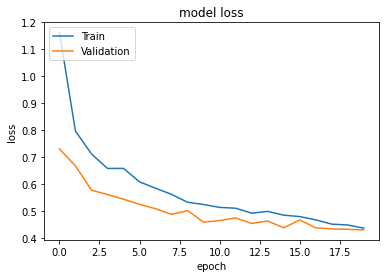

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("inception_resnet_v2_without_data_augmentation_loss.png")
plt.show()

In [19]:
model_3.save("inception_resnetv2_without_data_augmentation.h5")

In [20]:
del model_3
del inception_resnetv2

## Best Baseline model -> Resnet152V2

In [22]:
model = tf.keras.models.load_model("/kaggle/working/resnet152v2_without_data_augumentation.h5")

In [23]:
model.evaluate(x_val, y_val)

2022-12-14 06:30:51.441882: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 770703360 exceeds 10% of free system memory.


31/31 [==============================] - 14s 323ms/step - loss: 0.3816 - accuracy: 0.8816


[0.38161906599998474, 0.8816326260566711]

In [24]:
y_pred = model.predict(x_val)

In [28]:
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val, axis=1)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       255
           1       0.77      0.88      0.82       272
           2       0.97      0.91      0.94       171
           3       0.91      0.94      0.92       282

    accuracy                           0.88       980
   macro avg       0.90      0.88      0.89       980
weighted avg       0.89      0.88      0.88       980



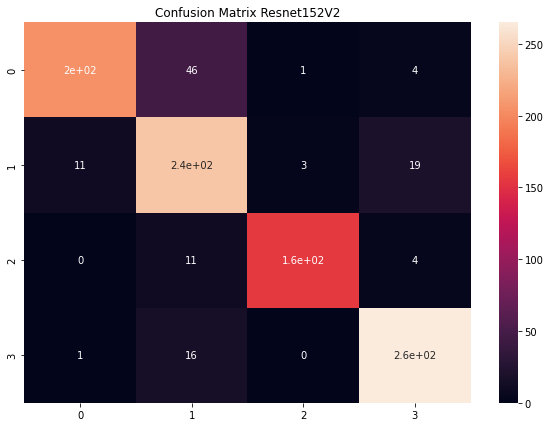

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title("Confusion Matrix Resnet152V2")
plt.savefig("resnet_152V2_confusion_matrix.png")
plt.show()